In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('movies.csv', encoding='latin-1')
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


### Dataset Movie Industry
There are 6820 movies in the dataset (220 movies per year, 1986-2016)

In [8]:
print(df.shape)

(6820, 15)


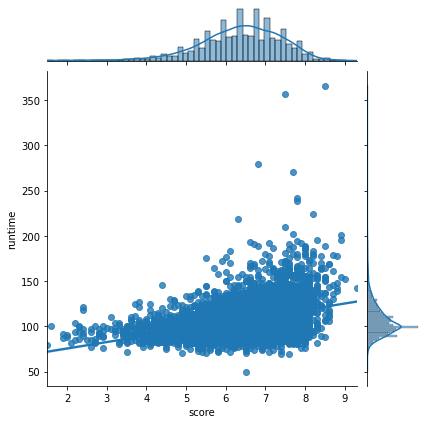

In [9]:
sns.jointplot(x='score', y='runtime', 
              data=df, kind='reg')

Большинство положительных голосов за фильмы продолжительностью 80-150 мин

In [10]:
top_company_df = df.groupby('company')[['score']].sum()\
    .sort_values('score', ascending=False).head(10)

top_company_df.style.bar()

,score
company,
Universal Pictures,1931.700000
Warner Bros.,1877.000000
Paramount Pictures,1632.800000
Twentieth Century Fox Film Corporation,1270.400000
New Line Cinema,1057.000000
Columbia Pictures Corporation,1040.000000
Touchstone Pictures,829.800000
Columbia Pictures,682.100000
Walt Disney Pictures,645.700000


Universal Pictures и Warner Bros набрали больше всего положительных отзывов

<AxesSubplot:ylabel='name'>

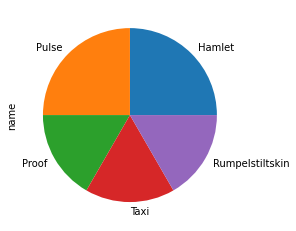

In [13]:
name_dynamics = df['name'].value_counts().head()
name_dynamics.plot(kind='pie', y='Count')

Самые популярные фильмы  - Pulse & Hamlet

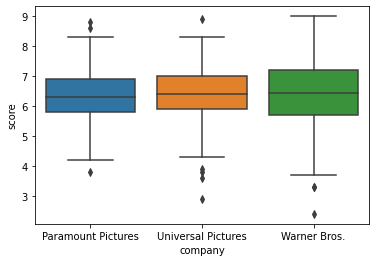

In [17]:
top_company = df.company.value_counts().sort_values(ascending=False).head(3).index.values
top_company
ax = sns.boxplot(x="company", y="score", 
            data=df[df.company.isin(top_company)])

Как мы видим, у топовых кинокомпаний оценки примерно одинаковые

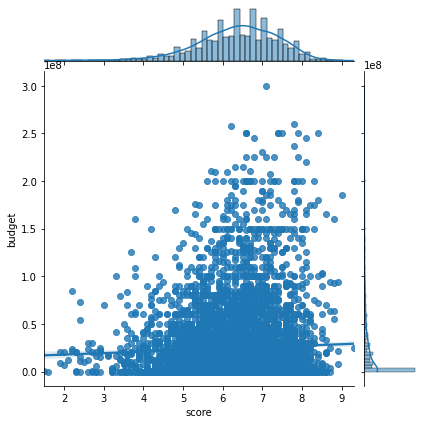

In [19]:
sns.jointplot(x='score', y='budget', 
              data=df, kind='reg')

Можно снять хороший фильм с бюджетом 10000000

In [26]:
platform_genre_sales = df.pivot_table(
                        index='genre', 
                        columns='budget', 
                        values='score', 
                        aggfunc=sum).fillna(0).applymap(float)

platform_genre_sales

budget,0.0,6000.0,7000.0,15000.0,20000.0,22769.0,23000.0,25000.0,30000.0,38000.0,...,215000000.0,220000000.0,225000000.0,230000000.0,237000000.0,245000000.0,250000000.0,258000000.0,260000000.0,300000000.0
genre,,,,,,,,,,,,,,,,,,,,,
Action,1368.6,0.0,6.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.5,8.1,27.8,7.0,7.8,14.9,43.5,6.2,0.0,7.1
Adventure,648.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.3,0.0,7.9,0.0,0.0,0.0,14.9,0.0,0.0,0.0
Animation,334.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8,0.0
Biography,832.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comedy,4802.4,0.0,0.0,0.0,0.0,6.5,7.1,13.9,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Crime,1107.7,7.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Drama,4365.1,0.0,6.9,5.6,7.3,0.0,0.0,0.0,7.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Family,46.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fantasy,16.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


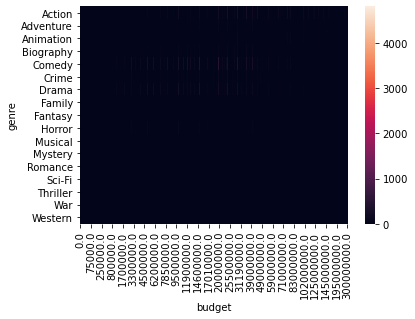

In [29]:
ax = sns.heatmap(platform_genre_sales.head(20))

В жанре "Comedy" больше всего очков, рассмотрим подробнее:

In [35]:
top_genre_df = df.groupby('genre')[['score']].sum()\
    .sort_values('score', ascending=False).head(10)

top_genre_df.style.bar()

,score
genre,
Comedy,12824.800000
Drama,9697.500000
Action,8127.200000
Crime,3526.800000
Biography,2527.500000
Adventure,2491.100000
Animation,1868.900000
Horror,1575.300000
Mystery,241.000000


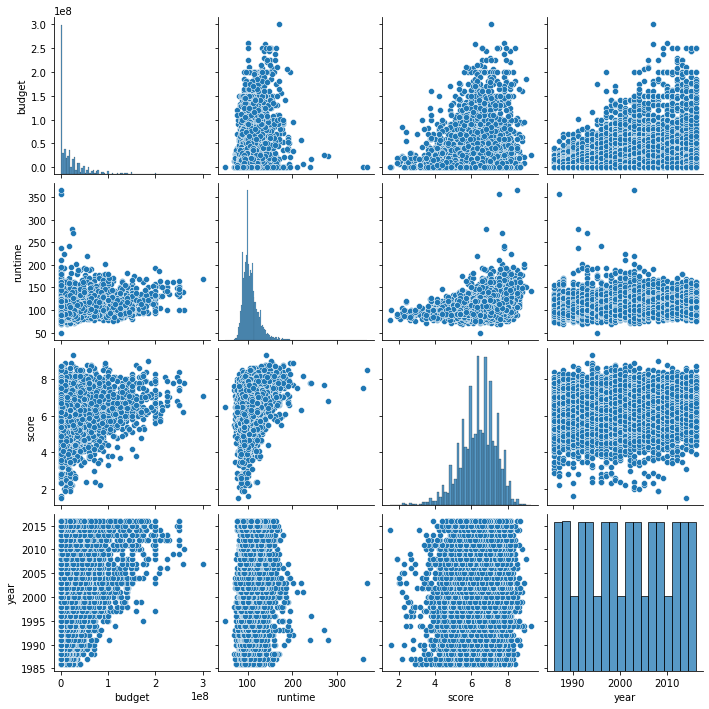

In [36]:
sns_plot = sns.pairplot(
    df[['budget','runtime', 'score','year']])
sns_plot

У современных фильмов бюджет выше. С течением лет продолжительность фильмов особо не изменилась. Положительных отзывов с большим бюджетом стало также больше